# Import data

The import code in this section is specific to the CSV automatically generated for each collective dialouge on remesh. To use data from other sources, import code will need written which transforms the data into the following format:


*   A list named *qs* where each list entry is a dataframe with data for a quesiton/prompt
*   Each data frame for a quesiton/prompt is formatted such that rows correspond to *responses* and there are the following columns: *Question*, *Question Type*, *Responses* , *Segment 1* , *Segment 2*, ... , *Segmnet N*
*   The values in the columns for each segment are the fraction of participants in that segment which agree with the response in that row.

It is also helpful to have the code output the list of questions and segments and their IDs so they can be referenced by ID for use in later sections of this notebook.



In [1]:
from google.colab import files
import pandas as pd
import csv
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data from file
pd.set_option('display.max_colwidth', 0)
uploaded = files.upload()
filename = next(iter(uploaded))
with open(filename,'r') as file:
  csvreader = csv.reader(file)
  r = 1
  data = []
  qdata = []
  for row in csvreader:
    if r>9:
      if row == []:
        data.append(qdata)
        qdata = []
      else:
        qdata.append(row)
    r=r+1
  data.append(qdata)

#handle blank row
data = data[1:]

#percent string to float
def p2f(x):
  try:
    if x==' - ':
      return float("nan")
    else:
      return float(x.strip('%'))/100
  except:
    return x

#make numeric
nq = len(data)
qs = []
meta = [["question type","question text"]]
for i in range(0,nq):
  d = data[i]
  m = [d[1][1],d[1][2]]
  meta.append(m)
  if d[1][1] == 'Poll Single Select':
    for r in range(1,len(d)):
      for c in range(4,len(d[0])):
        d[r][c] = p2f(d[r][c])
  if d[1][1] == 'Poll Multi Select':
    for r in range(1,len(d)):
      for c in range(4,len(d[0])):
        d[r][c] = p2f(d[r][c])
  if d[1][1] == 'Ask Opinion':
    for r in range(1,len(d)):
      for c in range(6,len(d[0])-3):
        d[r][c] = p2f(d[r][c])
  df = pd.DataFrame(d[1:],columns = d[0])
  qs.append(df)
qmeta = pd.DataFrame(meta[1:],columns = meta[0])

print("Questions:")
qmeta

Saving CD3_vax.csv to CD3_vax.csv
Questions:


,question type,question text
0,Poll Single Select,What is your age?
1,Poll Single Select,What is your ethnicity?
2,Poll Single Select,What gender do you identify with?
3,Poll Single Select,What political party do you most identify with?
4,Poll Single Select,What is your highest level of education?
5,Poll Single Select,How much have you heard or read about AI (Artificial Intelligence)?
6,Poll Single Select,"How often do you use an AI assistant such as ChatGPT, Claud, and Bard?"
7,Poll Single Select,"Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…"
8,Poll Single Select,What religious group or faith do you most identify with?
9,Poll Single Select,"Overall, do you think the public has insights useful to guide how AI Assistants answer difficult questions?"


In [3]:
#extract segments
d=data[0]
segments = []
if d[1][1] == 'Poll Single Select':
  r=0
  for c in range(4,len(d[0])):
    segments.append(d[r][c])
if d[1][1] == 'Ask Opinion':
  r=0
  for c in range(5,len(d[0])-3):
    segments.append(d[r][c])
print("Segments")
pd.DataFrame(segments)

Segments


,0
0,All(929)
1,O1: 18-24 (104)
2,O1: 25-34 (186)
3,O1: 35-44 (166)
4,O1: 45-54 (161)
...,...
61,FInal support (706)
62,Final unsure (97)
63,Final don't support (97)
64,"O10: Yes, the public should help to decide how AI assistants answer difficult questions (698)"


# Visualize poll data

This section enables a simple visualization of poll data cut by segments.

In [4]:
import matplotlib.pyplot as plt
plt.close("all")

In [5]:
#plot poll data
def plot_poll(df,segs):
  print(df["Question"][1])
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[4+segs[i]])
  dfplt = df[segs_incl]
  dfplt = dfplt.set_index('Responses')
  dfplt.plot.barh()
  return dfplt

#to make tables pretty
def make_pretty(styler):
  styler.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")
  styler.format(precision=2)
  return styler

#give poll data table
def poll_data_table(df,segs):
  print(df["Question"][1])
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[4+segs[i]])
  dfplt = df[segs_incl]
  dfplt = dfplt.set_index('Responses')
  return dfplt

In [6]:
#choose question and segments
qid = 23
segs = [0,1,2,3,4,5,12,13,16,17,18,52,53,54,55,56,57,58,59,60]

#plot
poll_data_table(qs[qid],segs).style.pipe(make_pretty)

Lastly, now that you've had some more time to review each policy section, would you say that overall you support this policy?


,All(900),O1: 18-24 (101),O1: 25-34 (184),O1: 35-44 (160),O1: 45-54 (159),O1: 55+ (296),O3: Male (428),O3: Female (458),O4: Democrat (315),O4: Republican (249),O4: Independant (325),Christian (442),Religious - non-christian (109),Non-religious (349),White (602),Black (138),Not white or black (160),High school or less (454),College / Bachelors degree (324),Masters / PhD (122)
Responses,,,,,,,,,,,,,,,,,,,,
Yes - I support this policy,0.78,0.83,0.80,0.73,0.82,0.77,0.82,0.75,0.87,0.72,0.76,0.76,0.79,0.81,0.78,0.86,0.74,0.76,0.82,0.77
Unsure,0.11,0.09,0.11,0.13,0.07,0.12,0.08,0.13,0.08,0.13,0.12,0.12,0.09,0.10,0.11,0.07,0.13,0.11,0.11,0.09
No - I don't support this policy,0.11,0.08,0.09,0.14,0.11,0.11,0.10,0.12,0.05,0.15,0.12,0.12,0.12,0.09,0.11,0.07,0.14,0.13,0.07,0.14


In [7]:
#choose question and segments
qid = 23
segs = [49,50,51]

#plot
poll_data_table(qs[qid],segs).style.pipe(make_pretty)

Lastly, now that you've had some more time to review each policy section, would you say that overall you support this policy?


,Initial support (631),Initial unsure (124),Initial not support (145)
Responses,,,
Yes - I support this policy,0.97,0.49,0.21
Unsure,0.02,0.41,0.23
No - I don't support this policy,0.00,0.10,0.57


In [8]:
#choose question and segments
qid = 23
segs = [35,36,37]

#plot
poll_data_table(qs[qid],segs).style.pipe(make_pretty)

Lastly, now that you've had some more time to review each policy section, would you say that overall you support this policy?


,O8: More excited than concerned (282),O8: Equally concerned and excited (403),O8: More concerned than excited (215)
Responses,,,
Yes - I support this policy,0.88,0.83,0.57
Unsure,0.06,0.08,0.21
No - I don't support this policy,0.05,0.09,0.22


Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…


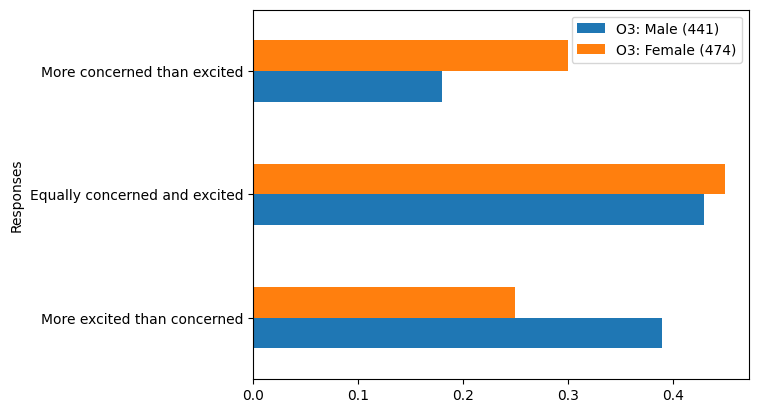

In [10]:
#choose question and segments
qid = 7
segs = [12,13]

#plot
d =plot_poll(qs[qid],segs)